In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import numpy as np
from sympy import *
from sympy import lambdify
from sympy.utilities.lambdify import lambdastr

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d

from time import time
from src.support_class import *
from src import jeffery_model as jm
from IPython.display import display

init_printing(use_latex='mathjax')


-0.004959811876114134 -307316.6165344212
0.0 0.0
-1.2201005208083386e-07 -2.9024057733591056e+16


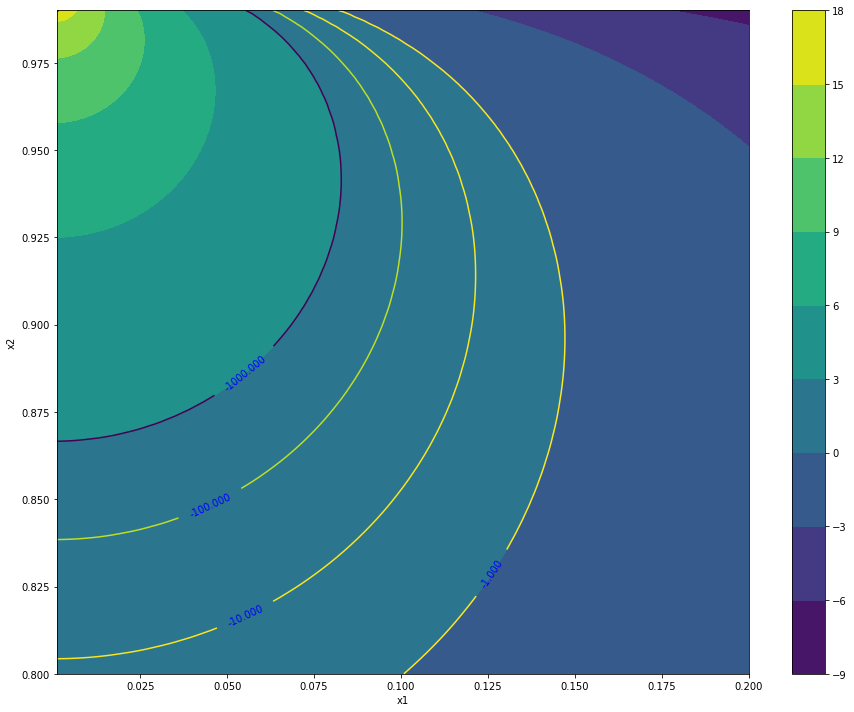

In [18]:
StokesletsStrength = np.array((1, 0, 0))
alpha = 1
h = 1
lbd = (alpha ** 2 - 1) / (alpha ** 2 + 1)
r, z = np.meshgrid(np.linspace(1e-3, 0.2, 100), np.linspace(0.8, 0.99, 100))
problem = jm.HalfSpaceJefferyProblem(h=h, StokesletsStrength=StokesletsStrength)

location = np.vstack((r.flatten(), r.flatten() * 0, z.flatten()))
Jij = problem.J_matrix(location)
JijT = Jij.transpose(1, 0, 2)
Sij = 1 / 2 * (Jij + JijT)
Oij = 1 / 2 * (Jij - JijT)
Bij = (Oij + lbd * Sij).transpose((2, 0, 1))
TrB2 = []
TrB3 = []
for bij in Bij:
    b2 = np.dot(bij, bij)
    b3 = np.dot(b2, bij)
    TrB2.append(np.trace(b2))
    TrB3.append(np.trace(b3))
TrB2 = np.hstack(TrB2).reshape(r.shape)
TrB3 = np.hstack(TrB3).reshape(r.shape)
DtLine = TrB2 ** 3 - 6 * TrB3 ** 2
print(TrB2.max(), TrB2.min(), )
print(TrB3.max(), TrB3.min(), )
print(DtLine.max(), DtLine.min(), )

fig = plt.figure(figsize=(13, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)
# cf = ax0.contourf(r, z, np.log10(TrB2))
cf = ax0.contourf(r, z, np.log10(np.abs(DtLine)))
plt.colorbar(cf, ax=ax0, orientation='vertical')
cf = ax0.contour(r, z, DtLine, [-1000, -100, -10, -1, 1, 10, 100, 1000])
ax0.clabel(cf, colors ='b')
ax0.contour(r, z, DtLine, 0)
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
plt.tight_layout()


(100, 100)

In [43]:
r, z = np.meshgrid(np.linspace(-1, 1, 2), np.linspace(0, 2, 2))
location = np.vstack((r.flatten(), r.flatten() * 0, z.flatten()))
# location = np.array(((1, 1), 
#                      (1, 2),
#                      (1, 1), ))
problem = jm.HalfSpaceJefferyProblem(h=1, StokesletsStrength=StokesletsStrength)
Jij = problem.J_matrix(location)
JijT = Jij.transpose(1, 0, 2)
# print(Jij)
# print('---------------------------')
# print(JijT)
for t1 in Jij:
    print(t1)
    print('++++++++++++++++')


[[ 0.          0.          0.00413979 -0.00413979]
 [ 0.          0.          0.          0.        ]
 [ 0.08440465  0.08440465 -0.02975822 -0.02975822]]
++++++++++++++++
[[ 0.          0.          0.          0.        ]
 [ 0.          0.         -0.01431909  0.01431909]
 [ 0.          0.          0.          0.        ]]
++++++++++++++++
[[-0.         -0.         -0.00564967 -0.00564967]
 [-0.         -0.         -0.         -0.        ]
 [-0.         -0.          0.0101793  -0.0101793 ]]
++++++++++++++++


In [44]:
Jij.shape

(3, 3, 4)

In [41]:
Jij

array([[[ 0.        ,  0.        ,  0.00413979, -0.00413979],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.08440465,  0.08440465, -0.02975822, -0.02975822]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , -0.01431909,  0.01431909],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-0.        , -0.        , -0.00564967, -0.00564967],
        [-0.        , -0.        , -0.        , -0.        ],
        [-0.        , -0.        ,  0.0101793 , -0.0101793 ]]])